
# Investigating Hollywood Blockbusters: Comparing and Contrasting Film Financials with Profit and Popularity

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



> For this project I have chosen the TMDB movie dataset to work with. I'll be investigating questions relating to the budgets as dependent variables and the revenues, runtimes, release dates and average voter scores as independent variables. I'll be asking questions to compare or contrast any correlations from the relationship between these variables.

In [2]:
# Here I am loading in the programs I'll use to analyze and chart my data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Here I load in my data using pandas and take a first glance at what the data looks like.

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Here, using '.info()', I gain a general view of the scope of my data. Right off the bat I can see that data is
# missing from several col's. Knowing what variables I'll want to look at for my investigation, I can see several
# of these are droppable. However, before dropping any col's, I am going to take a deeper look at the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Looking at the data correlating to numbers, something pops out right away: 'popularity' offers no context for it's 
# scale, so I will have to use vote_average instead. I'll use the mean of the 'vote_average's as a baseline 
# for popularity.

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

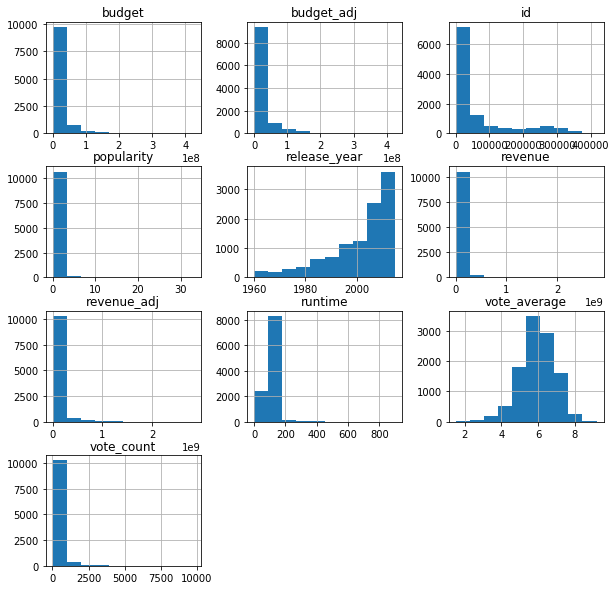

In [7]:
df.hist(figsize=(10, 10));

### Data Cleaning

In [8]:
# Dropped cols that had no relevance to my questions.

df.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies',
        'vote_count', 'release_year', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [9]:
# Dropped rows that had NULL 'budget' or 'revenue', as my questiions are specific to 'budget' and 'revenue'

df.dropna(inplace=True)

In [10]:
# To simplify data, dropped rows that have a budget less than half a million dollars.

df=df[df.budget >= 500000]

In [11]:
# To simplify data, dropped rows that have a revenue less than 10 millions dollars.

df=df[df.revenue >= 10000000]

In [12]:
#rearrange col's to move 'original_title' to position 0, to make reading data easier in context of film title.

# Tried this, but didn't work ('revenue' would appear in position 0):

#cols = df.columns.tolist()
#cols = cols[2:3] + cols[:2] + cols[3:]
#df = df[cols]
#df

#So tried this instead:

df = df[['original_title', 'budget', 'revenue', 'runtime', 'genres', 'release_date', 'vote_average']]
df

,original_title,budget,revenue,runtime,genres,release_date,vote_average
0,Jurassic World,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5
1,Mad Max: Fury Road,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1
2,Insurgent,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,6.3
3,Star Wars: The Force Awakens,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5
4,Furious 7,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,7.3
5,The Revenant,135000000,532950503,156,Western|Drama|Adventure|Thriller,12/25/15,7.2
6,Terminator Genisys,155000000,440603537,125,Science Fiction|Action|Thriller|Adventure,6/23/15,5.8
7,The Martian,108000000,595380321,141,Drama|Adventure|Science Fiction,9/30/15,7.6
8,Minions,74000000,1156730962,91,Family|Animation|Adventure|Comedy,6/17/15,6.5
9,Inside Out,175000000,853708609,94,Comedy|Animation|Family,6/9/15,8.0


In [13]:
# Last check to see that my data is clean and uniform.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3058 entries, 0 to 10848
Data columns (total 7 columns):
original_title    3058 non-null object
budget            3058 non-null int64
revenue           3058 non-null int64
runtime           3058 non-null int64
genres            3058 non-null object
release_date      3058 non-null object
vote_average      3058 non-null float64
dtypes: float64(1), int64(3), object(3)
memory usage: 191.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 - What is the correlation between budget, revenue and popularity?

> First, we take a look at our three variables: budget, revenue and vote_average.

In [14]:
# Here I begin to investigate my three trimmed variables, starting with budget.

df.budget.describe()

count    3.058000e+03
mean     4.418987e+07
std      4.436614e+07
min      5.000000e+05
25%      1.500000e+07
50%      3.000000e+07
75%      6.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

> Out of 3058 films, our average film budget is ~44 million USD.

In [15]:
# Next is revenue.

df.revenue.describe()

count    3.058000e+03
mean     1.345001e+08
std      1.890878e+08
min      1.000000e+07
25%      3.000069e+07
50%      6.838542e+07
75%      1.591320e+08
max      2.781506e+09
Name: revenue, dtype: float64

> Our average film revenue is ~134 million USD.

In [16]:
# Next is vote_average.

df.vote_average.describe()

count    3058.000000
mean        6.211609
std         0.778841
min         3.300000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

> And our average film rating is a 6.2/10.

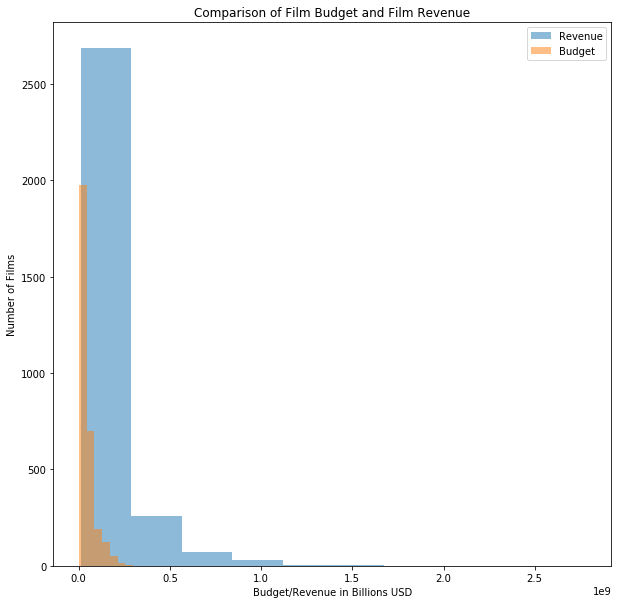

In [20]:
# Here I compare budget and revenue histograms.

fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df['revenue'], alpha=0.5, label='Revenue')
ax.hist(df['budget'], alpha=0.5, label='Budget')
ax.set_title('Comparison of Film Budget and Film Revenue')
ax.set_xlabel('Budget/Revenue in Billions USD')
ax.set_ylabel('Number of Films')
plt.legend();

> From this histogram it would appear that revenue far surpasses film budget, on average. But, it does appear there is a likeness between revenue and budget. Let's look further.

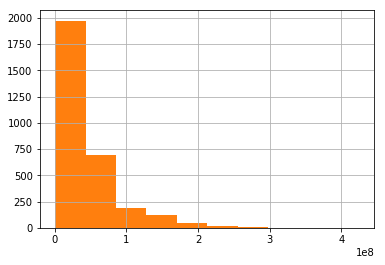

In [25]:
# Here I compare budget and vote_average histograms.

df['vote_average'].hist()
df['budget'].hist();


In [ ]:
# Here I compare revenue and vote_average histograms.



### Research Question 2  - What parameters might determine a film's gross?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Research Question 3  - Are high grossing films the most popular?

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])